**Abstract**

The dataset  aims to facilitate the prediction of music genres based on various audio features extracted from music tracks from spotify. This dataset offers a comprehensive collection of features including tempo,energy,loudness, acousticness ,danceability and others.The notebook used methods such as histogram plotting, box plots of python's matplotlib and seaborn library to answer below questions about the dataset


* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much?

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

 * Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.

**Dataset**

The dataset consists of a set of audio features provided by spotify
It consists of 18 columns

instance_id       
artist_name        
track_name        
popularity        
acousticness      
danceability      
duration_ms       
energy            
instrumentalness  
key               
liveness          
loudness          
mode              
speechiness       
tempo             
obtained_date     
valence           
music_genre  

The target variable is music_genre

The full list of genres included are : 'Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap', 'Blues', 'Rock', 'Classical', 'Hip-Hop'

There are a total of 50000 observations.

**Importing necessary libraries**

In [2]:
# installing dependencies
!pip install eli5

In [3]:
#Importing all packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

In [4]:
# Reading the music genre dataset
data = pd.read_csv(
    "https://raw.githubusercontent.com/Malini240/DataScience_Music_Genre_Prediction_Dataset/main/music_genre.csv"
)

In [5]:
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,04-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,04-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,04-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,04-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,04-Apr,0.323,Electronic


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             45020 non-null  float64
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

**Q What are the data types? (Only numeric and categorical)**

In [7]:


# Inspecting data types of columns
data_types = data.dtypes


# Count categorical and numerical columns
numerical_count = data.select_dtypes(include=['int64', 'float64']).shape[1]
categorical_count = data.select_dtypes(include=['object']).shape[1]

# Filter numerical and categorical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64'])
categorical_columns = data.select_dtypes(include=['object'])

print("Data Types of Columns:")
print(data_types)

print("\nTotal Numerical Columns:", numerical_count)
print("Total Categorical Columns:", categorical_count)

print("\nNumerical Columns:")
print(numerical_columns.columns.tolist())

print("\nCategorical Columns:")
print(categorical_columns.columns.tolist())

Data Types of Columns:
instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
obtained_date        object
valence             float64
music_genre          object
dtype: object

Total Numerical Columns: 12
Total Categorical Columns: 6

Numerical Columns:
['instance_id', 'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

Categorical Columns:
['artist_name', 'track_name', 'key', 'mode', 'obtained_date', 'music_genre']




**Q - Are there missing values?**



In [8]:
#Q2 - Are there missing values?
# Check for missing values
missing_values = data.isna().sum()
print("Columns with missing values:")
print(missing_values);


Columns with missing values:
instance_id            5
artist_name            5
track_name             5
popularity             5
acousticness           5
danceability           5
duration_ms            5
energy                 5
instrumentalness       5
key                    5
liveness               5
loudness               5
mode                   5
speechiness            5
tempo               4985
obtained_date          5
valence                5
music_genre            5
dtype: int64


**DATA CLEANING**

In [9]:
#Display empty rows
print("Empty rows count :",data.isnull().all(axis=1).sum())


# Check for duplicate rows
duplicate_rows = data[data.duplicated()]


# Get the number of duplicate rows
num_duplicate_rows = len(duplicate_rows)
print("Number of duplicate rows:", num_duplicate_rows)

# Get the number of rows where duration is -1
print("Row count with duration -1 :",data[data['duration_ms'] == -1.0].shape[0])


Empty rows count : 5
Number of duplicate rows: 4
Row count with duration -1 : 4939


In [10]:
#Dropping rows with no data
data.dropna(how="all",inplace=True)
data.isna().sum()

#Dropping rows where duration is -1
data.drop(data.loc[data['duration_ms'] == -1.0].index, inplace=True)

print("Empty rows count :",data.isnull().all(axis=1).sum())
print("Row count with duration -1 :",data[data['duration_ms'] == -1.0].shape[0])



Empty rows count : 0
Row count with duration -1 : 0


In [11]:
#Checking high entropy features

#The features that are diverse throughout the dataset tend to have very less predictive properties and thus cannot be used for modeling

#instance_id unique values
print("Unique value count of instance_id:",len(data["instance_id"].unique()))

#track_name unique values
print("Unique value count of track_name:",len(data["track_name"].unique()))

#artist_name unique values
print("Unique value count of artist_name:",len(data["artist_name"].unique()))

#key unique values
print("Unique values for key :",data["key"].unique());

#mode unique values
print("Unique values for mode :",data["mode"].unique());

#date unique values
print("Unique values for date :",data["obtained_date"].unique());

#Target variable music genre  unique values
print("Unique values for  target  :",data["music_genre"].unique());







Unique value count of instance_id: 45061
Unique value count of track_name: 38086
Unique value count of artist_name: 6625
Unique values for key : ['D' 'G#' 'C#' 'F#' 'B' 'G' 'F' 'A' 'C' 'E' 'A#' 'D#']
Unique values for mode : ['Minor' 'Major']
Unique values for date : ['04-Apr' '03-Apr' '05-Apr' '01-Apr' '0/4']
Unique values for  target  : ['Electronic' 'Anime' 'Jazz' 'Alternative' 'Country' 'Rap' 'Blues' 'Rock'
 'Classical' 'Hip-Hop']


**Removing high entropy features**

 Key and mode are required for predicting the  target variable music genre

Artist_name is also  kept since a specific artist can be related to a particular music genre

 instance_id is entirely unique for all rows , cannot be used for prediction and can be removed

Track_name is also non predictor variable for finding the music genre

obtained_date does not give much information and has only 4 dates of April without any year , so can be removed

In [12]:

#Removing all non predictor features
data = data.drop(["instance_id", "track_name", "obtained_date"], axis = 1)
data.shape

(45061, 15)

In [13]:
# Handling empty_field value for artist name
count_empty_artist_name = data[data["artist_name"] == "empty_field"].shape[0]
print("Row count with artist name as empty field",count_empty_artist_name)

artists = data["artist_name"].value_counts()[:20].sort_values(ascending=True)
artists



Row count with artist name as empty field 2246


ASIAN KUNG-FU GENERATION      81
Ryuichi Sakamoto              83
Mac Miller                    85
Howard Shore                  86
Logic                         86
Kevin Gates                   90
Pyotr Ilyich Tchaikovsky      93
Future                       106
The Black Keys               107
Thievery Corporation         115
Eminem                       136
Capcom Sound Team            148
Drake                        152
Yuki Hayashi                 152
Frédéric Chopin              224
Ludwig van Beethoven         283
Johann Sebastian Bach        295
Wolfgang Amadeus Mozart      360
Nobuo Uematsu                386
empty_field                 2246
Name: artist_name, dtype: int64

**Visualization for songs per artist**

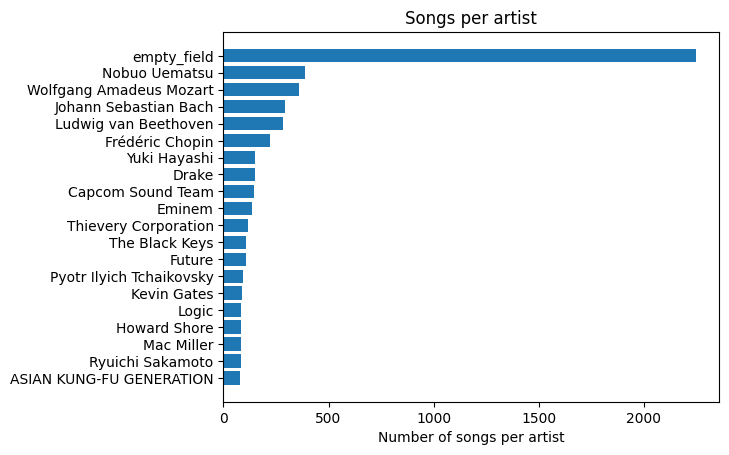

In [14]:
#Plot showing  the first 20 artists having the highest number of songs in the data.
plt.barh(artists.index, artists)
plt.xlabel("Number of songs per artist")
plt.title("Songs per artist")
plt.show()

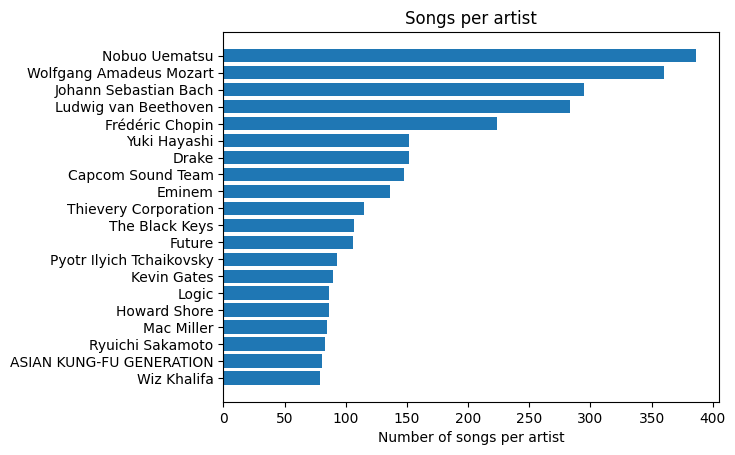

In [15]:
#empty_field is removed to make the visualisation look more uniform and index is reset
data = data.drop(data[data["artist_name"] == "empty_field"].index)
#data.reset_index(inplace = True)

#Plotting again
top_20_artists = data["artist_name"].value_counts()[:20].sort_values(ascending = True)
plt.barh(top_20_artists.index, top_20_artists)
plt.xlabel("Number of songs per artist")
plt.title("Songs per artist")
plt.show()



In [16]:
data.shape

(42815, 15)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42815 entries, 1 to 50004
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       42815 non-null  object 
 1   popularity        42815 non-null  float64
 2   acousticness      42815 non-null  float64
 3   danceability      42815 non-null  float64
 4   duration_ms       42815 non-null  float64
 5   energy            42815 non-null  float64
 6   instrumentalness  42815 non-null  float64
 7   key               42815 non-null  object 
 8   liveness          42815 non-null  float64
 9   loudness          42815 non-null  float64
 10  mode              42815 non-null  object 
 11  speechiness       42815 non-null  float64
 12  tempo             38556 non-null  float64
 13  valence           42815 non-null  float64
 14  music_genre       42815 non-null  object 
dtypes: float64(11), object(4)
memory usage: 5.2+ MB


**Checking and handling missing values through imputation**

Number of missing values in 'tempo' column: 4259


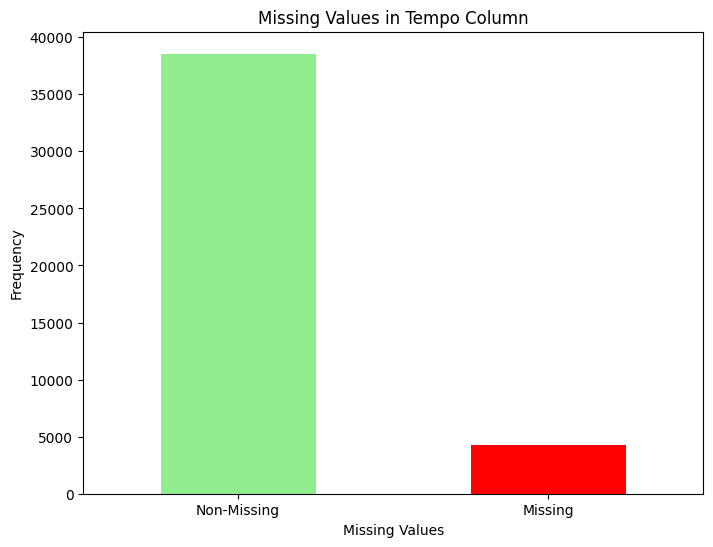

Mean value for tempo : 119.87300785869903
Final mean value for tempo:  119.873


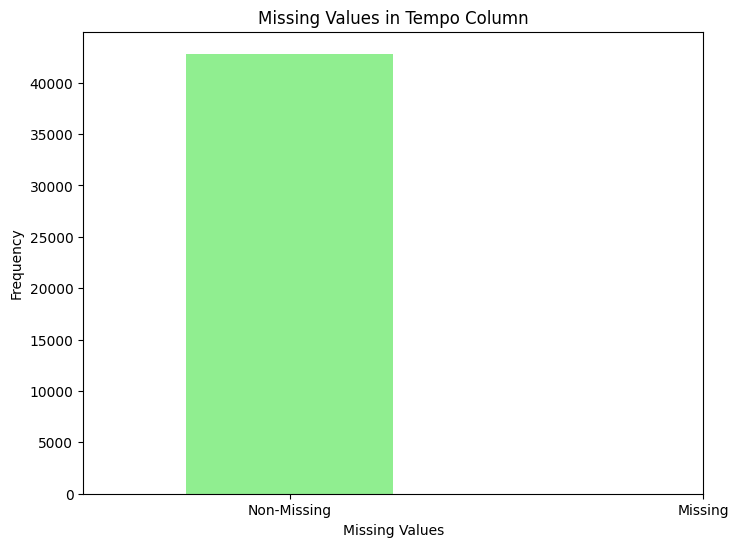

In [18]:
# Check for missing values in the 'tempo' column and using mean imputation method to replace the null values
missing_tempo = data['tempo'].isnull().sum()
print("Number of missing values in 'tempo' column:", missing_tempo)

# Create a bar plot to visualize missing values
plt.figure(figsize=(8, 6))
data['tempo'].isnull().value_counts().plot(kind='bar', color=['lightgreen', 'red'])
plt.title('Missing Values in Tempo Column')
plt.xlabel('Missing Values')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Non-Missing', 'Missing'], rotation=0)
plt.show()

# Calculate the mean of the 'tempo' column
mean_tempo = data['tempo'].mean()
print("Mean value for tempo :",mean_tempo)

#Rounding to 3 decimal places
final_mean_tempo=round(mean_tempo,3)
print("Final mean value for tempo: ",final_mean_tempo)

# Impute missing values with the mean
data['tempo'].fillna(mean_tempo, inplace=True)


# Create a bar plot to visualize missing values after imputation
plt.figure(figsize=(8, 6))
data['tempo'].isnull().value_counts().plot(kind='bar', color=['lightgreen', 'red'])
plt.title('Missing Values in Tempo Column')
plt.xlabel('Missing Values')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Non-Missing', 'Missing'], rotation=0)
plt.show()




In [19]:
# Save the copy of DataFrame till this point
datawith_outliers=data.copy()


# Checking that missing values have been imputed
missing_tempo_after_imputation = data['tempo'].isnull().sum()
print("Number of missing values in 'tempo' column after imputation:", missing_tempo_after_imputation)

Number of missing values in 'tempo' column after imputation: 0


In [20]:
data.shape

(42815, 15)

**DATA VISUALIZATION FOR MAIN CATEGORICAL FEATURES**

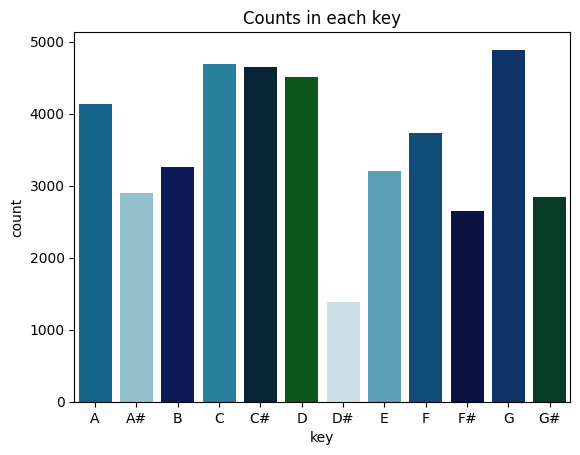

In [21]:
def plot_counts(feature, order=None):
    sns.countplot(x=feature, data=data, hue=feature, palette="ocean", order=order, legend=False)
    plt.title(f"Counts in each {feature}")
    plt.show()

#Plot for keys
plot_counts("key", ["A", "A#", "B", "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#"])


*As it can be observed from the above histogram plot, the most frequent key is G followed by C*

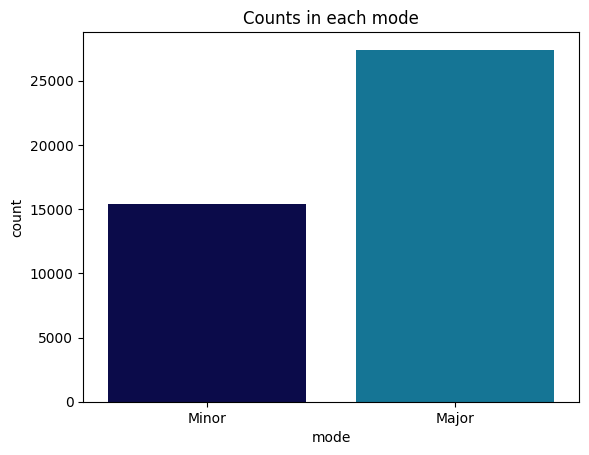

In [22]:
plot_counts("mode")


*As it can be observed from the above histogram plot, most songs are in major end of the spectrum*

**DATA DISTRIBUTION FOR MUSIC GENRE**

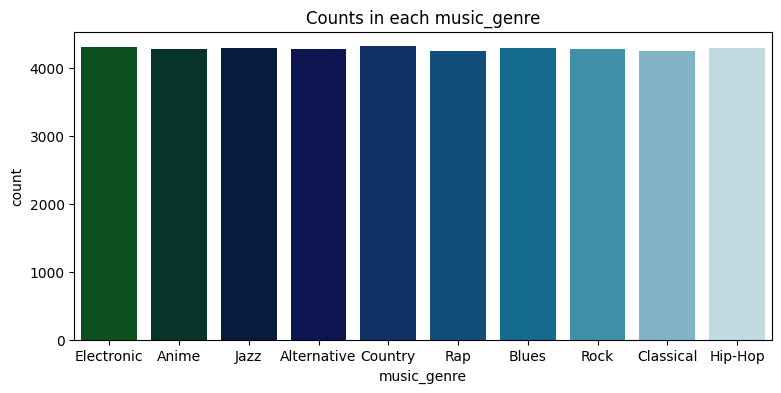

In [23]:

plt.figure(figsize = (9, 4))
plot_counts("music_genre")



**Checking music genre data distribution**

There are 10 different genres with equal distribution which is balanced data, hence resampling is not required

In [24]:
data['music_genre'].value_counts()

Country        4316
Electronic     4307
Jazz           4291
Hip-Hop        4290
Blues          4287
Anime          4282
Rock           4273
Alternative    4270
Classical      4251
Rap            4248
Name: music_genre, dtype: int64

**Q Distribution of numeric variables**





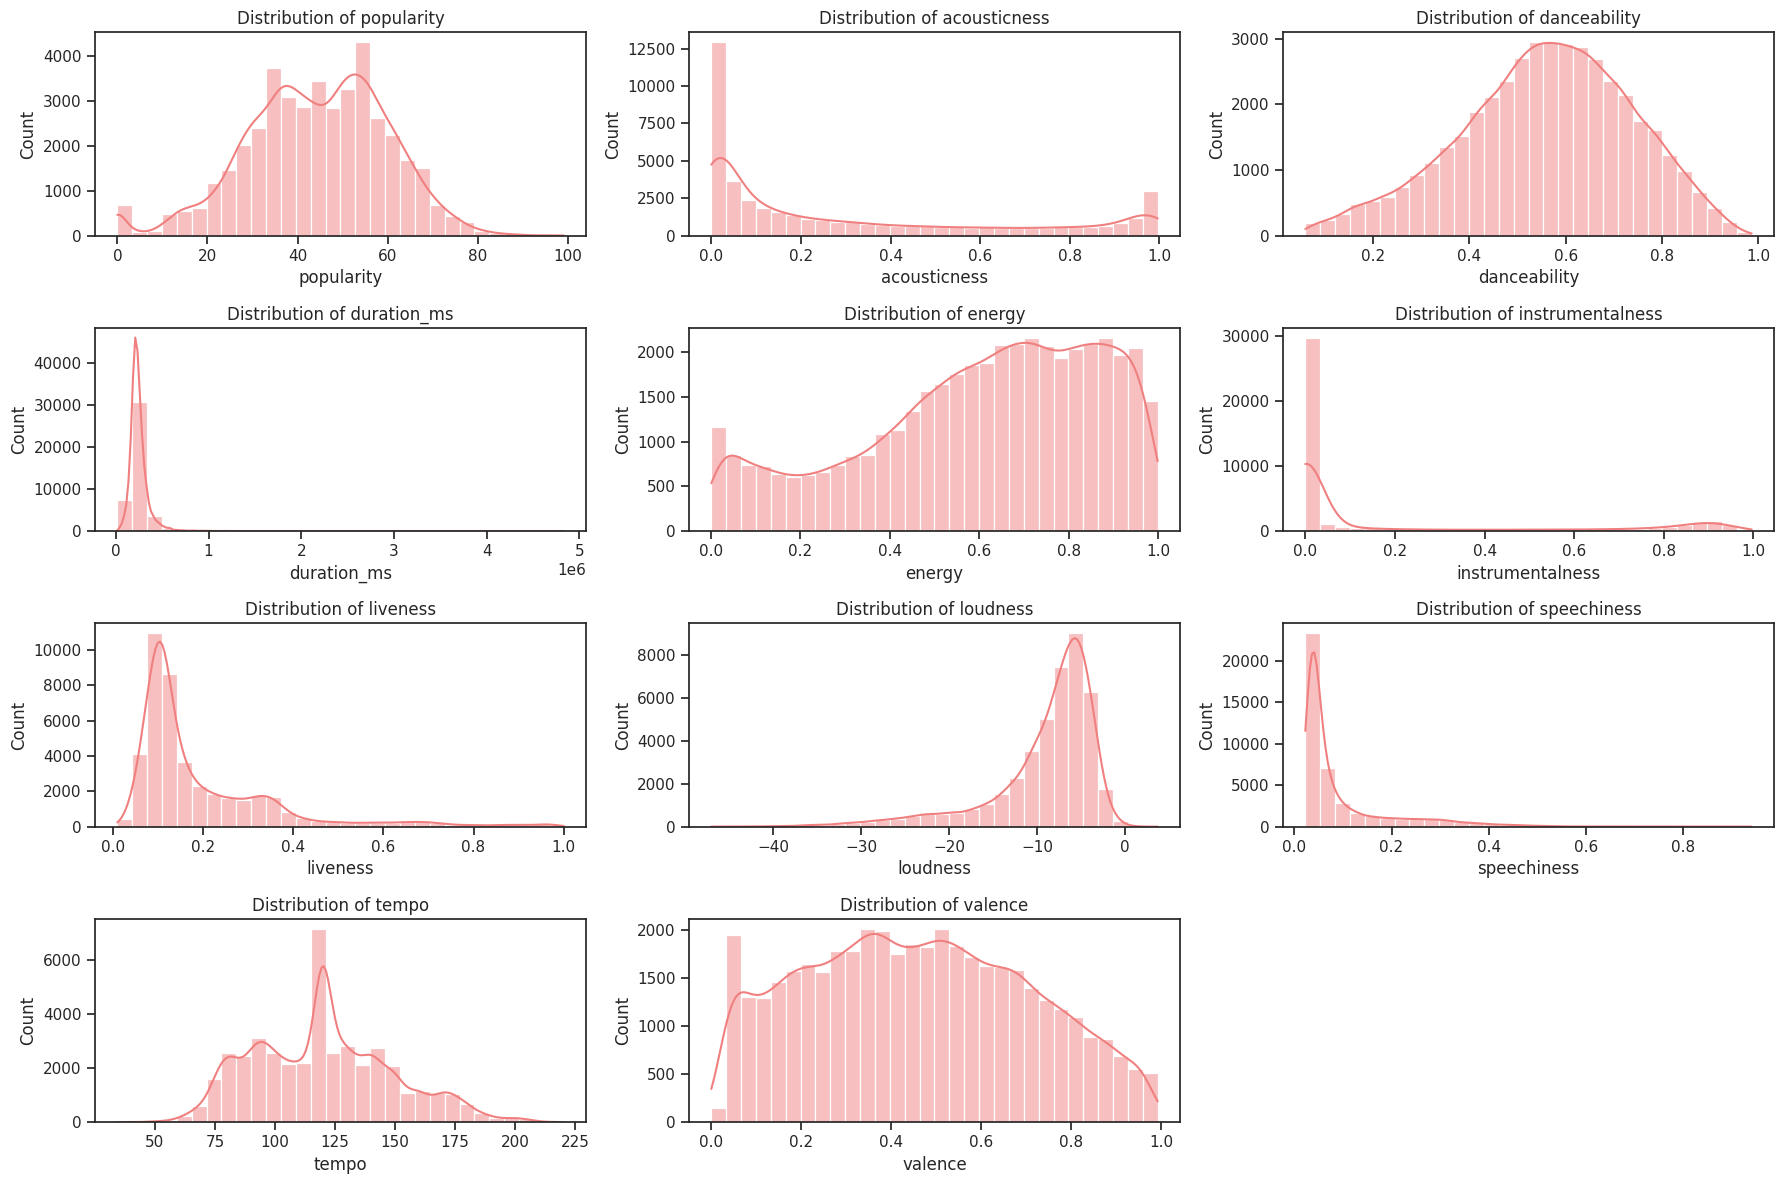

In [25]:
import matplotlib.pyplot as plt

# Storing numeric features in a separate variable for distribution
numeric_features = data.drop(["key", "music_genre", "mode","artist_name"], axis=1)


# Setting the style of seaborn
sns.set(style="ticks")

# Creating subplots for each numerical feature
plt.figure(figsize=(18, 12))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[feature], kde=True, color='lightcoral', bins=30)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

Popularity has bi-modal distribution having 2 peaks. Some values have much higher frequencies.

Acousticness is measured on a scale of 0.0 (not acoustic) to 1.0 (very acoustic). Songs with higher acousticness are more likely to use acoustic and non-electronic instruments. The  subplot shows that most songs / music pieces are not acoustic.

Danceability quantifies how suitable a track is for dancing based on a combination of musical elements.. Songs with higher danceability have stronger and more regular beats. Like acousticness, danceability is measured on a scale of 0.0 (low danceability) to 1.0 (high danceability). In terms of danceability, values in this feature have an almost normal distribution.

Music duration is given in milliseconds. Most samples are not longer than 0.3e6 (300 000) milliseconds, or 300 seconds, or exactly 5 minutes which is reasonable.

Energy measures the perceived intensity and activity of a song. Energy is also measured on a scale of 0.0 (low energy) to 1.0 (high energy). Songs with higher energy are more intense, dynamic, and loud. The distribution on the subplot shows that most of the music pieces are described with high energy.

Instrumentalness predicts whether a track contains vocals. Instrumentalness is measured on a scale of 0.0 (likely contains vocal content) to 1.0 (likely contains no vocal content). Songs with higher instrumentalness are less likely to have vocals. Distribution of values in terms of instrumentalness is quite skewed - most samples has value of 0 or around 0, which means the songs are characterized with vocal content.

Liveness detects the presence of an audience in a song. Liveness is also measured on a scale of 0.0 (no audience) to 1.0 (audible audience). Songs with higher liveness are more likely to have been performed live. It seems the songs in our dataset are performed without audience - most liveness values are closer to 0.0 than to 1.0.

The next feature is loudness - it measures the decibel level of a song. Decibels are relative to a reference value, so songs with lower loudness values are quieter relative to the reference value of 0. Taking this into account, value distribution in loudness shows that most music samples are quieter (their loudness is closer to 0).

Speechiness measures the presence of spoken words in a song. It is measured on a scale of 0.0 (low speechiness) to 1.0 (high speechiness). Songs with higher speechiness are mostly composed of spoken words, like poetry . Distribution of speechiness is rather skewed on the right - most songs / pieces seem to have no or very small number of spoken words.

Tempo measures the beats per minute (bpm) of a song. Many popular songs range from 50 bpm to 200 bpm. Songs with higher tempo have a faster pace. Distribution of tempo values is very similar to that  of "popularity".

And finally, valence measures the positivity of a song. It is measured on a scale from 0.0 (low valence) to 1.0 (high valence). Songs with higher valence sound happier and more cheerful. Distribution of valence in  dataset is not very normal - valence of most songs is somewhere between 0.2 and 0.7. Only a tiny number of songs are characterised with high valence.

 **Q Do the ranges of the predictor variables make sense?**

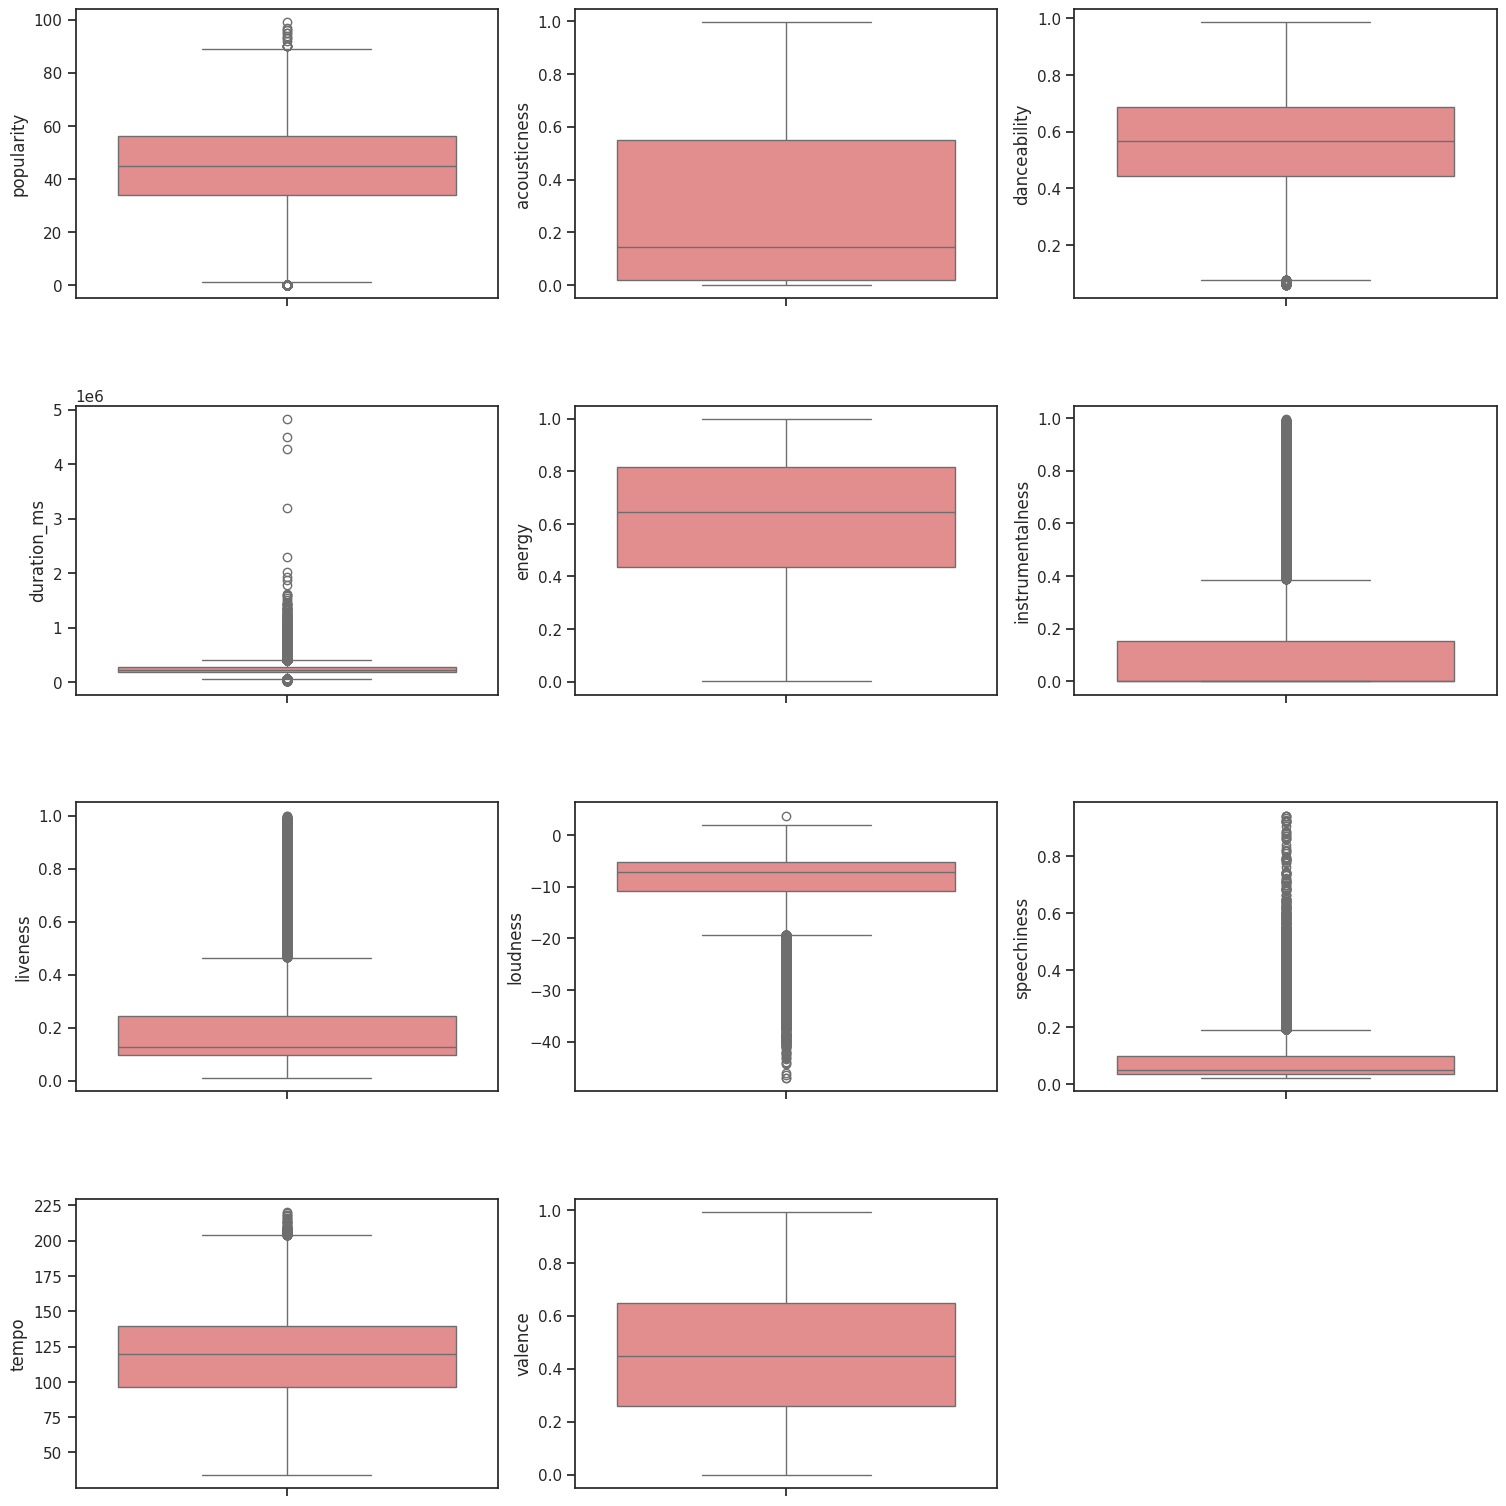

In [26]:
## Checking the Ranges of the predictor variables and dependent variable
fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (15, 15))
fig.delaxes(axs[3][2])
idx = 0
axs = axs.flatten()
for k, v in numeric_features.items():
    sns.boxplot(y = k, data = numeric_features, ax = axs[idx],color="lightcoral")
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

The range makes sense but some of the features such as loudness, liveness,speechiness, duration and instrumentalness have outliers that needs to be removed and normalized





**Handling outliers**



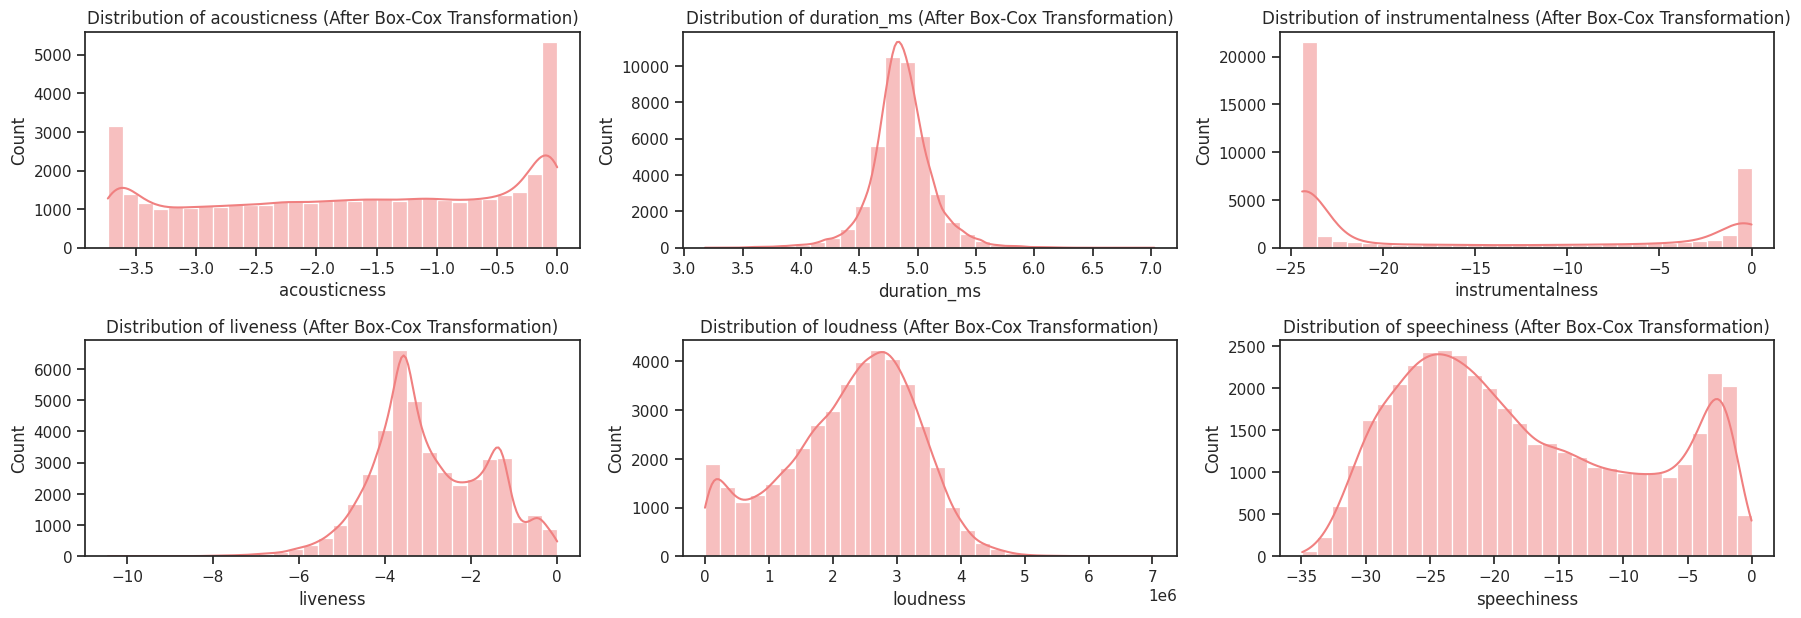

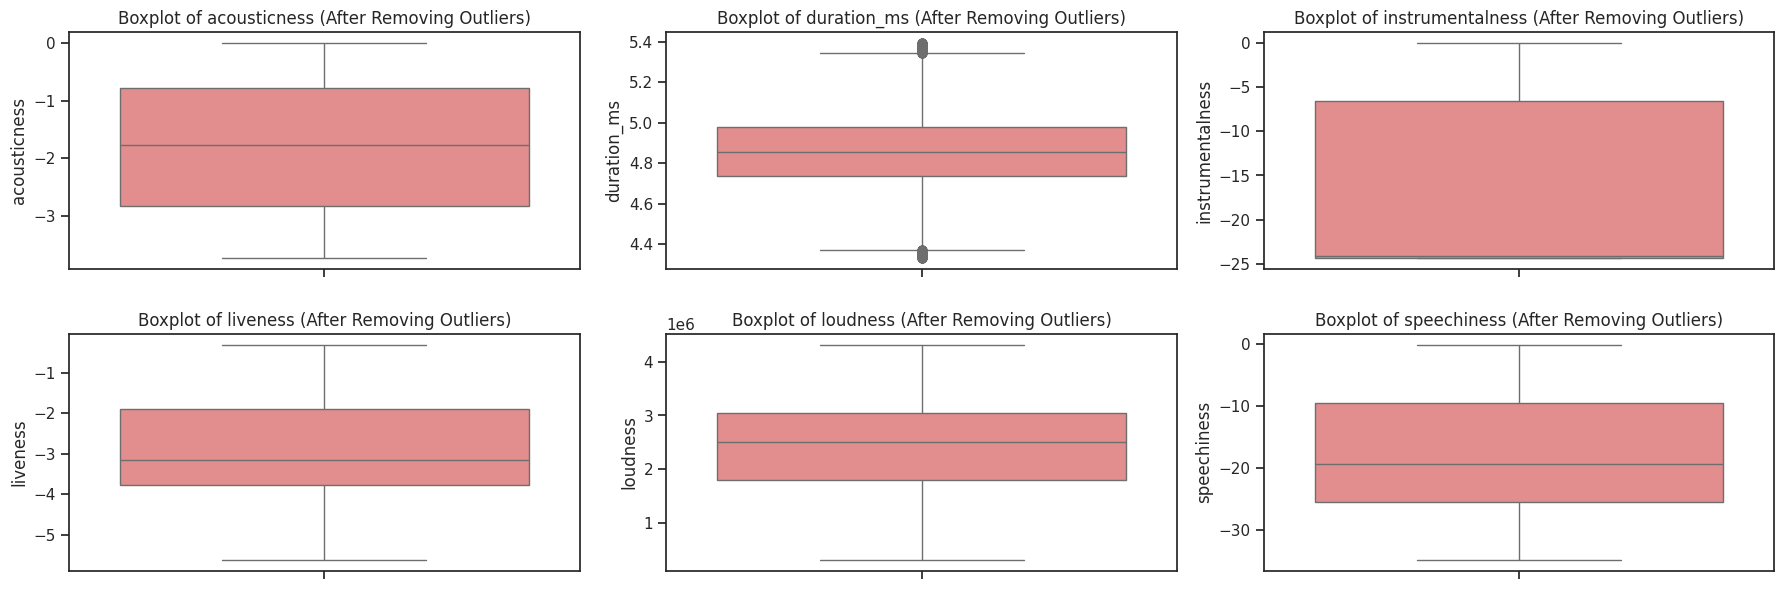

In [27]:
from scipy.stats import boxcox


#converting ms to s since duration has a lot of outliers
data["duration_ms"]=data["duration_ms"]/1000


# Features to be transformed
skewed_features = numeric_features.drop(["tempo", "popularity", "danceability", "valence", "energy"], axis=1)
# ['loudness', 'speechiness', 'liveness', 'duration_ms', 'instrumentalness', 'acousticness']




# Apply Box-Cox transformation to skewed features
for feature in skewed_features:
    # Box-Cox transformation requires positive values, so we add a small constant to avoid zero values
    min_value = abs(data[feature].min()) + 0.001
    data[feature] = data[feature] + min_value
    data[feature] = data[feature] + 0.001
    # Perform Box-Cox transformation
    data[feature], _ = boxcox(data[feature])

# Plot the transformed distributions
plt.figure(figsize=(18, 12))
for i, feature in enumerate(skewed_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[feature], kde=True, color='lightcoral', bins=30)
    plt.title(f'Distribution of {feature} (After Box-Cox Transformation)')

plt.tight_layout()
plt.show()


# Remove outliers for each skewed feature
for feature in skewed_features:
    mean = data[feature].mean()
    std = data[feature].std()

    # Calculate the lower and upper bounds for outlier removal
    lower_bound = mean - std * 2
    upper_bound = mean + std * 2

    # Remove outliers
    data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]




# # Plot the distributions after removing outliers
# plt.figure(figsize=(18, 12))
# for i, feature in enumerate(skewed_features, 1):
#     plt.subplot(4, 3, i)
#     sns.histplot(data[feature], kde=True, color='lightcoral', bins=30)
#     plt.title(f'Distribution of {feature} (After Removing Outliers)')

# plt.tight_layout()
# plt.show()


# Plot boxplots for the skewed features after removing outliers
plt.figure(figsize=(18, 12))
for i, feature in enumerate(skewed_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data[feature], color='lightcoral')
    plt.title(f'Boxplot of {feature} (After Removing Outliers)')

plt.tight_layout()
plt.show()






Most of the outliers are normalised and removed

 **Label Encoding for Categorical variables**

In [28]:
le_key = LabelEncoder()
le_mode = LabelEncoder()
le_genre = LabelEncoder()

# Label encode the categorical variables
data['key'] = le_key.fit_transform(data['key'])
data['mode'] = le_mode.fit_transform(data['mode'])
data['music_genre'] = le_genre.fit_transform(data['music_genre'])

# Print class labels for each encoded variable
print("Class labels for 'key':", le_key.classes_)
print("Class labels for 'mode':", le_mode.classes_)
print("Class labels for 'music_genre':", le_genre.classes_)



data.head()

Class labels for 'key': ['A' 'A#' 'B' 'C' 'C#' 'D' 'D#' 'E' 'F' 'F#' 'G' 'G#']
Class labels for 'mode': ['Major' 'Minor']
Class labels for 'music_genre': ['Alternative' 'Anime' 'Blues' 'Classical' 'Country' 'Electronic'
 'Hip-Hop' 'Jazz' 'Rap' 'Rock']


,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
1,Thievery Corporation,31.0,-2.950082,0.622,4.826060,0.890,-0.049642,5,-3.254543,2.464434e+06,1,-28.774275,115.002,0.531,5
2,Dillon Francis,28.0,-3.401620,0.620,4.817080,0.755,-10.519865,11,-0.697351,3.191394e+06,0,-26.003334,127.994,0.333,5
3,Dubloadz,34.0,-2.643169,0.774,4.631538,0.700,-17.289811,4,-2.740574,3.230879e+06,0,-3.398913,128.014,0.270,5
4,What So Not,32.0,-3.294105,0.638,4.839515,0.587,-0.094845,9,-2.740574,2.681621e+06,0,-22.613199,145.036,0.323,5
6,Jordan Comolli,46.0,-2.579826,0.572,4.813006,0.803,-24.340011,2,-3.619140,3.299444e+06,0,-1.906814,149.995,0.230,5


**Q4 Which independent variables are useful to predict a target (dependent variable)?**

**Using correlation matrix, Recursive feature elimination, permutation importance and feature importance**

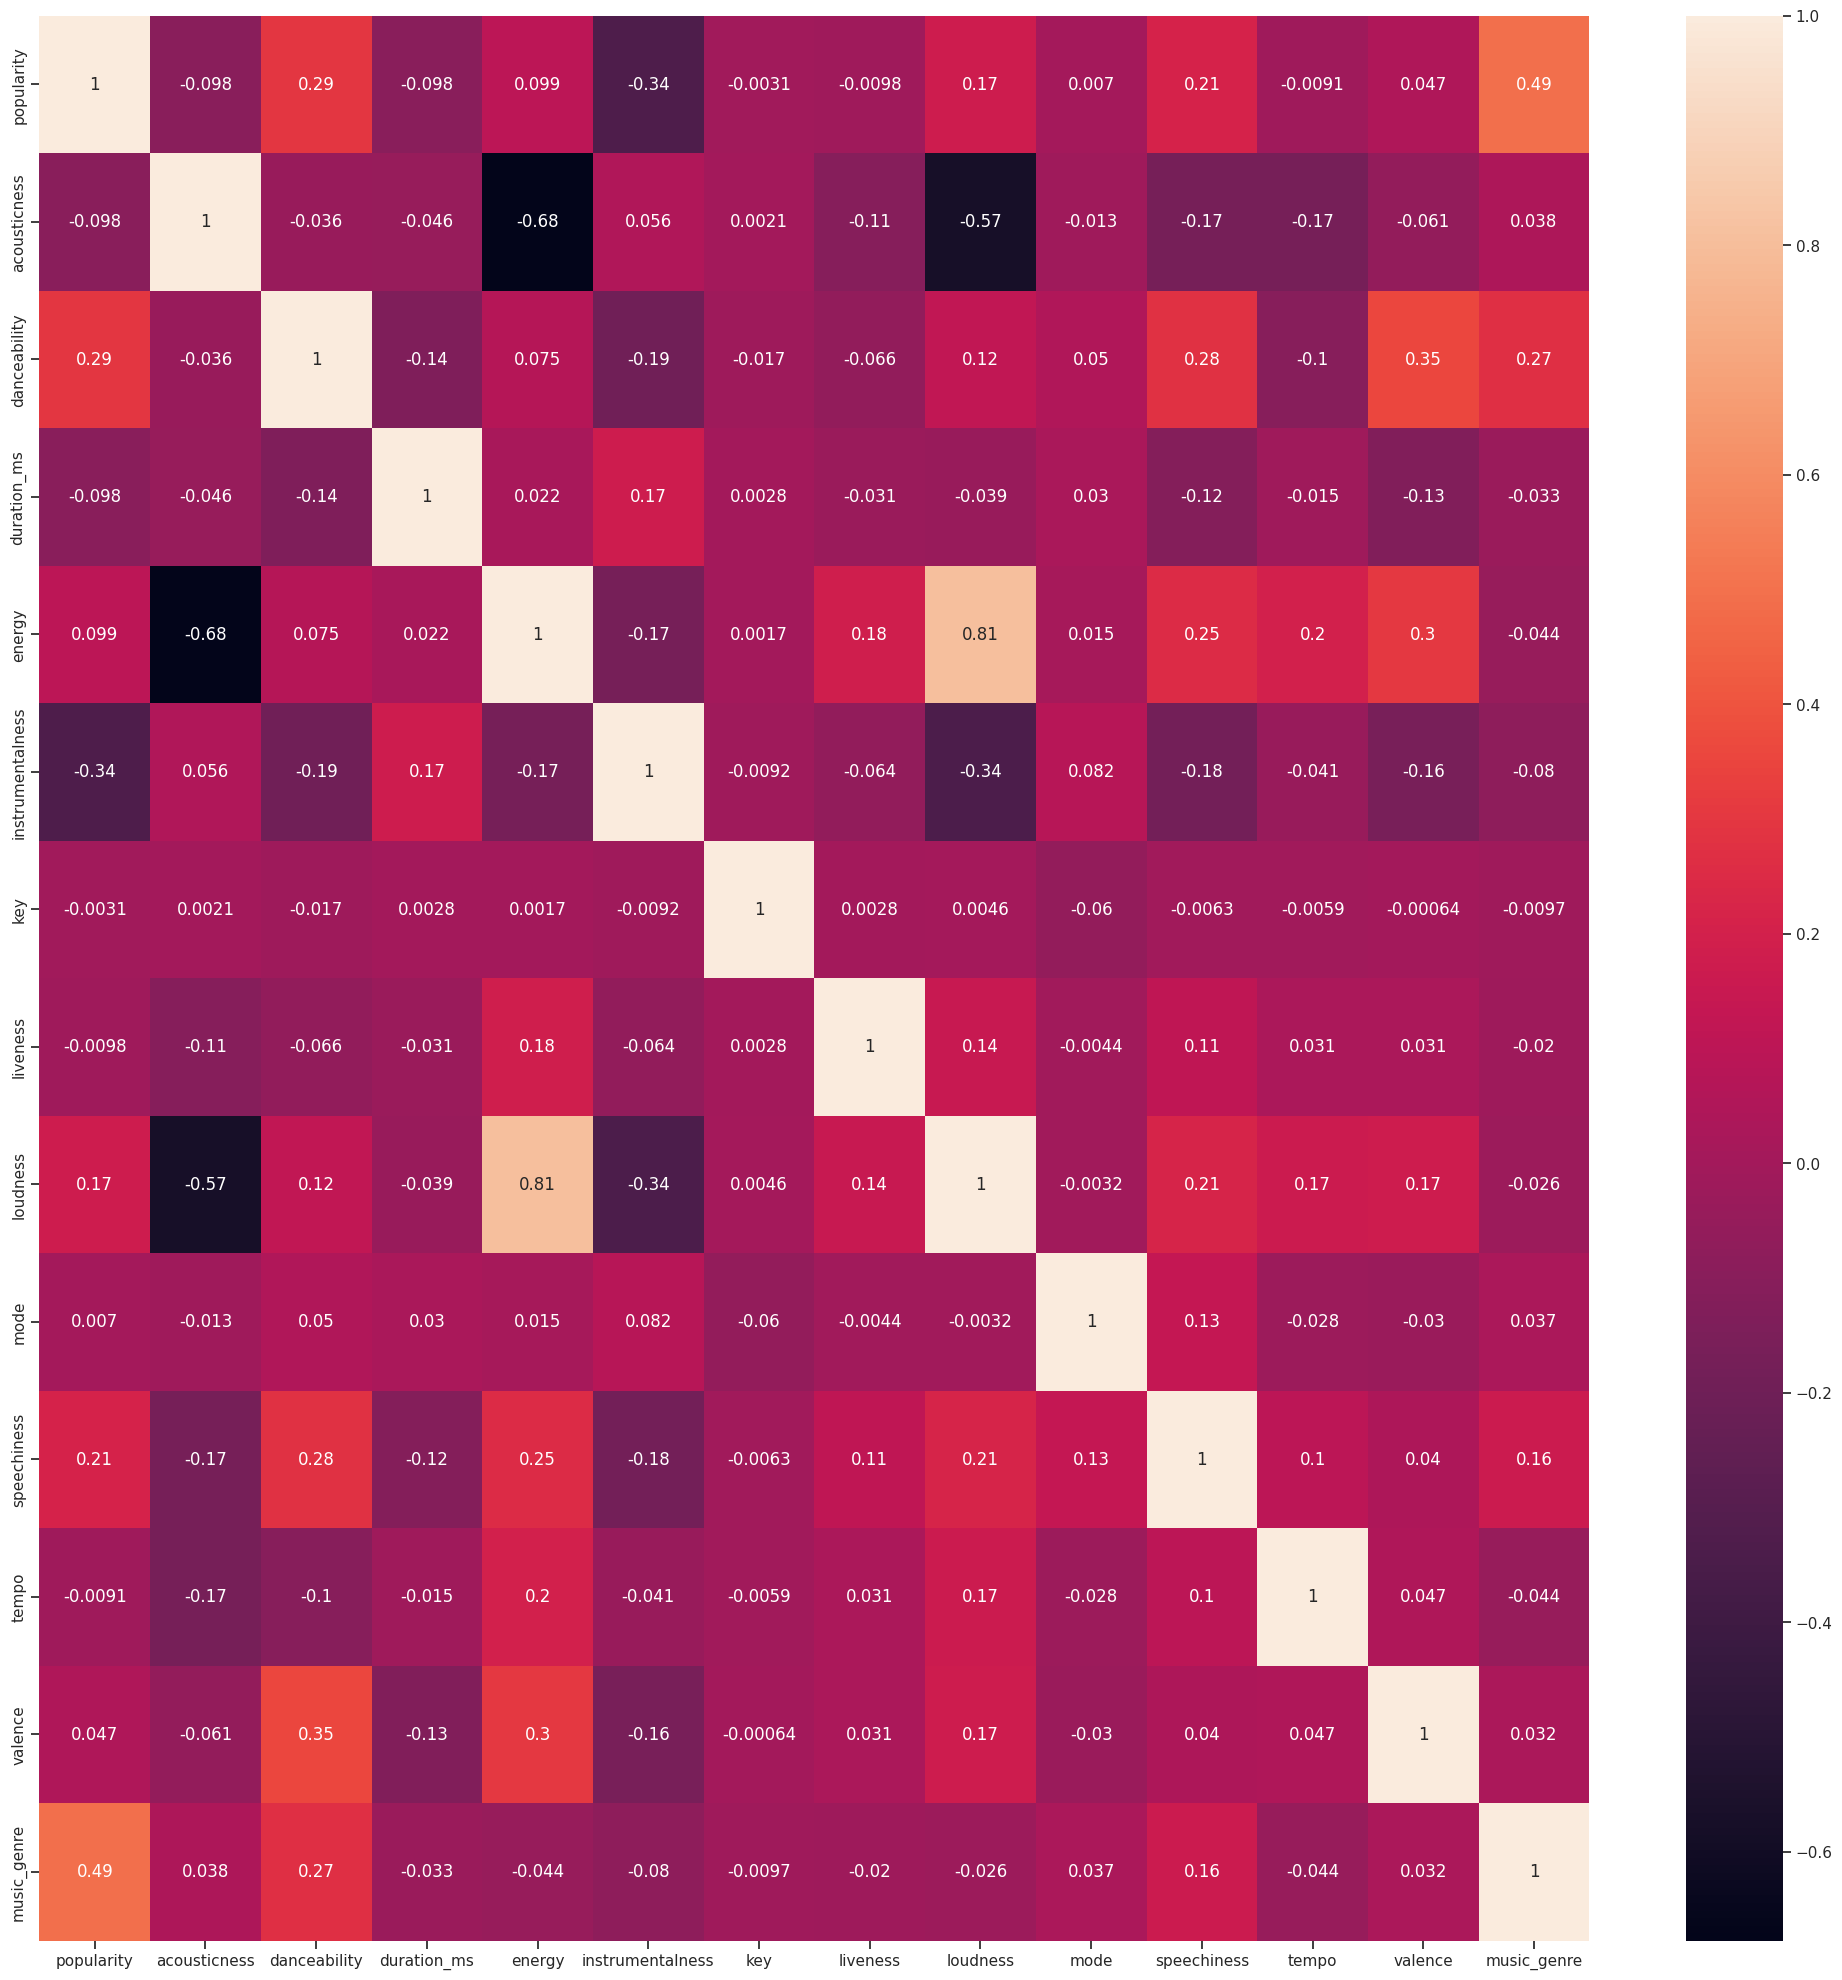

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36648 entries, 1 to 50004
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       36648 non-null  object 
 1   popularity        36648 non-null  float64
 2   acousticness      36648 non-null  float64
 3   danceability      36648 non-null  float64
 4   duration_ms       36648 non-null  float64
 5   energy            36648 non-null  float64
 6   instrumentalness  36648 non-null  float64
 7   key               36648 non-null  int64  
 8   liveness          36648 non-null  float64
 9   loudness          36648 non-null  float64
 10  mode              36648 non-null  int64  
 11  speechiness       36648 non-null  float64
 12  tempo             36648 non-null  float64
 13  valence           36648 non-null  float64
 14  music_genre       36648 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 4.5+ MB


In [29]:


# Correlation Matrix
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True)
plt.show()


data.info()

In [30]:
corr_matrix = data.corr()
correlations = corr_matrix['music_genre'].sort_values(ascending=False)
print(correlations)

music_genre         1.000000
popularity          0.494256
danceability        0.271367
speechiness         0.163682
acousticness        0.037854
mode                0.036671
valence             0.032369
key                -0.009652
liveness           -0.019889
loudness           -0.025893
duration_ms        -0.033001
energy             -0.043786
tempo              -0.043926
instrumentalness   -0.080485
Name: music_genre, dtype: float64


<ipython-input-30-9fc93aa0e8e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


**Q Is the predictor variables independent of all the other predictor variables**

This can be inferred from the correlation matrix.
Energy and loudness are highly correlated with each other with a value of 0.8
There are also moderately correlated variables such as danceability and valence

**Taking top correlation features with music_genre only**

In [31]:
data.drop(['key','tempo','artist_name','liveness','duration_ms','energy'],axis=1,inplace=True)
print(data.head())
print(data.info())

   popularity  acousticness  danceability  instrumentalness      loudness  \
1        31.0     -2.950082         0.622         -0.049642  2.464434e+06   
2        28.0     -3.401620         0.620        -10.519865  3.191394e+06   
3        34.0     -2.643169         0.774        -17.289811  3.230879e+06   
4        32.0     -3.294105         0.638         -0.094845  2.681621e+06   
6        46.0     -2.579826         0.572        -24.340011  3.299444e+06   

   mode  speechiness  valence  music_genre  
1     1   -28.774275    0.531            5  
2     0   -26.003334    0.333            5  
3     0    -3.398913    0.270            5  
4     0   -22.613199    0.323            5  
6     0    -1.906814    0.230            5  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 36648 entries, 1 to 50004
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        36648 non-null  float64
 1   acousticness 

**Q Do the training and test sets have the same data?**

No, the training and test sets do not have the same data. This is indicated by the output from the provided code snippet, which reveals that there are no common data points shared between the training and test sets. The absence of common data points ensures that the model is evaluated on entirely unseen data during the testing phase.

In [32]:
# Splitting the dataset
data.dropna(how='any', inplace=True)
from sklearn.model_selection import train_test_split

# Limiting the dataset size
sample_size = 20000  # Choose your desired sample size
data_subset = data.sample(n=sample_size, random_state=42)

from sklearn.model_selection import train_test_split

X = data_subset.drop(columns=['music_genre'])
y = data_subset['music_genre']


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, stratify = y, random_state =42 )
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

common_data_points = set(X_train.index) & set(X_test.index)
print("Common Data Points between Training and Test Sets:", len(common_data_points))


(14000, 8) (6000, 8) (14000,) (6000,)
Common Data Points between Training and Test Sets: 0


In [33]:
#Repeated feature elimination
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd



# Initialize a classifier
classifier = RandomForestClassifier()

# Initialize RFE
selector = RFE(estimator=classifier, n_features_to_select=5, step=1)

# Fit RFE to your data and get the selected features
selected_features = selector.fit_transform(X, y)

print("Selected Features:")
print(X.columns[selector.support_])

Selected Features:
Index(['popularity', 'acousticness', 'danceability', 'loudness',
       'speechiness'],
      dtype='object')


**Model 1 - Random Forest ( Without outliers)**




In [34]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=7)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)


# Extract feature importance and display feature names with importance
feature_importance = rf_classifier.feature_importances_
feature_names = X_train.columns  # Assuming you have access to feature names

# Display feature names with importance
print("Feature\t\tImportance")
for i in range(len(feature_importance)):
    print(f"{feature_names[i]}\t\t{feature_importance[i]}")

    rf_accuracy = accuracy_score(y_test, rf_predictions)
print("\nRandom Forest Accuracy:", rf_accuracy)




Feature		Importance
popularity		0.2163292629145078
acousticness		0.13192285214953692
danceability		0.13406462701459765
instrumentalness		0.1161047171283627
loudness		0.1259512675568869
mode		0.018830448142334276
speechiness		0.14130475065482984
valence		0.115492074438944

Random Forest Accuracy: 0.5045


**Permutation Importance**

In [35]:
# Understanding the important features using Permutation Importance
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf_classifier, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.2350 ± 0.0058,popularity
0.0757 ± 0.0062,instrumentalness
0.0563 ± 0.0048,danceability
0.0511 ± 0.0033,speechiness
0.0385 ± 0.0051,acousticness
0.0340 ± 0.0053,loudness
0.0287 ± 0.0042,valence
0.0060 ± 0.0036,mode


**Model 2 - AdaBoost ( Without outliers)**


In [36]:
# from sklearn.ensemble import AdaBoostClassifier


# # Train AdaBoost classifier
# adaboost_classifier = AdaBoostClassifier(n_estimators=100, random_state=7)
# adaboost_classifier.fit(X_train, y_train)

# # Make predictions
# adaboost_predictions = adaboost_classifier.predict(X_test)



# # Extract feature importance and display feature names with importance
# feature_importance_adaboost = adaboost_classifier.feature_importances_

# print("Feature\t\tImportance")
# for i in range(len(feature_importance_adaboost)):
#     print(f"{feature_names[i]}\t\t{feature_importance_adaboost[i]}")

#     # Calculate accuracy
# adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
# print("AdaBoost Accuracy:", adaboost_accuracy)


from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

adaboost = AdaBoostClassifier(random_state=7)
grid_search = GridSearchCV(adaboost, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_adaboost = grid_search.best_estimator_

# Cross-validation
cross_val_scores = cross_val_score(best_adaboost, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores.mean())

# Make predictions with the best model
adaboost_predictions = best_adaboost.predict(X_test)

# Extract feature importance and display feature names with importance
feature_importance_adaboost = best_adaboost.feature_importances_

print("Feature\t\tImportance")
for i in range(len(feature_importance_adaboost)):
    print(f"{feature_names[i]}\t\t{feature_importance_adaboost[i]}")

# Calculate accuracy
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print("AdaBoost Accuracy:", adaboost_accuracy)

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Cross-Validation Scores: 0.46728571428571436
Feature		Importance
popularity		0.255
acousticness		0.095
danceability		0.185
instrumentalness		0.095
loudness		0.145
mode		0.015
speechiness		0.145
valence		0.065
AdaBoost Accuracy: 0.477


**Model 3 - xgboost ( Without outliers)**


In [37]:
import xgboost as xgb
# Train XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=7)
xgb_classifier.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_classifier.predict(X_test)

# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)

# Extract feature importance and display feature names with importance
feature_importance_xgb = xgb_classifier.feature_importances_

print("Feature\t\tImportance")
for i in range(len(feature_importance_xgb)):
    print(f"{feature_names[i]}\t\t{feature_importance_xgb[i]}")

XGBoost Accuracy: 0.5078333333333334
Feature		Importance
popularity		0.31641796231269836
acousticness		0.0995185449719429
danceability		0.0884251743555069
instrumentalness		0.12319882959127426
loudness		0.08258556574583054
mode		0.10149194300174713
speechiness		0.11869476735591888
valence		0.06966722756624222


**Q Which independent variables have missing data? How much?**

In [38]:
missing_values = data.isna().sum()
print("Columns with missing values:")
print(missing_values);

Columns with missing values:
popularity          0
acousticness        0
danceability        0
instrumentalness    0
loudness            0
mode                0
speechiness         0
valence             0
music_genre         0
dtype: int64


The missing variables have already been handled in the beggining, hence there are no missing independent variables in the dataset

**Q-Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

Three models namely Random Forest Classifier, ada boost and xg boost are used for the predictions with and without outliers. From the below predictions, the accuracy has an increase when the dataset is trained and tested with outliers compared to that of one without outliers in all the three cases

**Model building with outliers**

In [39]:
datawith_outliers = datawith_outliers.drop(["artist_name"], axis=1)

datawith_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42815 entries, 1 to 50004
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        42815 non-null  float64
 1   acousticness      42815 non-null  float64
 2   danceability      42815 non-null  float64
 3   duration_ms       42815 non-null  float64
 4   energy            42815 non-null  float64
 5   instrumentalness  42815 non-null  float64
 6   key               42815 non-null  object 
 7   liveness          42815 non-null  float64
 8   loudness          42815 non-null  float64
 9   mode              42815 non-null  object 
 10  speechiness       42815 non-null  float64
 11  tempo             42815 non-null  float64
 12  valence           42815 non-null  float64
 13  music_genre       42815 non-null  object 
dtypes: float64(11), object(3)
memory usage: 4.9+ MB


In [40]:
#Label encoding on with outlier data



le_key = LabelEncoder()
le_mode = LabelEncoder()
le_genre = LabelEncoder()

# Label encode the categorical variables
datawith_outliers['key'] = le_key.fit_transform(datawith_outliers['key'])
datawith_outliers['mode'] = le_mode.fit_transform(datawith_outliers['mode'])
datawith_outliers['music_genre'] = le_genre.fit_transform(datawith_outliers['music_genre'])

# Print class labels for each encoded variable
print("Class labels for 'key':", le_key.classes_)
print("Class labels for 'mode':", le_mode.classes_)
print("Class labels for 'music_genre':", le_genre.classes_)




Class labels for 'key': ['A' 'A#' 'B' 'C' 'C#' 'D' 'D#' 'E' 'F' 'F#' 'G' 'G#']
Class labels for 'mode': ['Major' 'Minor']
Class labels for 'music_genre': ['Alternative' 'Anime' 'Blues' 'Classical' 'Country' 'Electronic'
 'Hip-Hop' 'Jazz' 'Rap' 'Rock']


In [41]:
#Splitting test and train data set
datawith_outliers.dropna(how='any', inplace=True)
from sklearn.model_selection import train_test_split


# Limiting the dataset size
sample_size = 20000  # Choose your desired sample size
data_subset = datawith_outliers.sample(n=sample_size, random_state=42)

from sklearn.model_selection import train_test_split

X = data_subset.drop(columns=['music_genre'])
y = data_subset['music_genre']
# X = datawith_outliers.drop(columns=['music_genre'])
# y = datawith_outliers['music_genre']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, stratify = y, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14000, 13) (6000, 13) (14000,) (6000,)


**Model 1 - Random Forest (with outliers)**

In [42]:
# Random forest classifier with outliers



from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=7)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)


# Extract feature importance and display feature names with importance
feature_importance = rf_classifier.feature_importances_
feature_names = X_train.columns  # Assuming you have access to feature names

# Display feature names with importance
print("Feature\t\tImportance")
for i in range(len(feature_importance)):
    print(f"{feature_names[i]}\t\t{feature_importance[i]}")

    rf_accuracy = accuracy_score(y_test, rf_predictions)
print("\nRandom Forest Accuracy:", rf_accuracy)






Feature		Importance
popularity		0.17764674962515534
acousticness		0.08690963861807097
danceability		0.09086645729241707
duration_ms		0.0665477284588342
energy		0.08041614221714889
instrumentalness		0.08266177117280155
key		0.035252863159098945
liveness		0.05312444655156978
loudness		0.09396426984319362
mode		0.012062726538364205
speechiness		0.09212278603420188
tempo		0.05770269781351351
valence		0.07072172267563012

Random Forest Accuracy: 0.56


**Model 2 - Adaboost (With Outliers)**

In [43]:
# #adaboost with oultliers

# from sklearn.ensemble import AdaBoostClassifier


# # Train AdaBoost classifier
# adaboost_classifier = AdaBoostClassifier(n_estimators=100, random_state=7)
# adaboost_classifier.fit(X_train, y_train)

# # Make predictions
# adaboost_predictions = adaboost_classifier.predict(X_test)



# # Extract feature importance and display feature names with importance
# feature_importance_adaboost = adaboost_classifier.feature_importances_

# print("Feature\t\tImportance")
# for i in range(len(feature_importance_adaboost)):
#     print(f"{feature_names[i]}\t\t{feature_importance_adaboost[i]}")

#     # Calculate accuracy
# adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
# print("AdaBoost Accuracy:", adaboost_accuracy)




from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

adaboost = AdaBoostClassifier(random_state=7)
grid_search = GridSearchCV(adaboost, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_adaboost = grid_search.best_estimator_

# Cross-validation
cross_val_scores = cross_val_score(best_adaboost, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores.mean())

# Making  predictions with the best model
adaboost_predictions = best_adaboost.predict(X_test)

# Extract feature importance and display feature names with importance
feature_importance_adaboost = best_adaboost.feature_importances_

print("Feature\t\tImportance")
for i in range(len(feature_importance_adaboost)):
    print(f"{feature_names[i]}\t\t{feature_importance_adaboost[i]}")

# Calculate accuracy
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print("Optimized AdaBoost Accuracy:", adaboost_accuracy)

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Cross-Validation Scores: 0.5156428571428571
Feature		Importance
popularity		0.265
acousticness		0.095
danceability		0.125
duration_ms		0.06
energy		0.075
instrumentalness		0.09
key		0.0
liveness		0.0
loudness		0.06
mode		0.015
speechiness		0.15
tempo		0.0
valence		0.065
Optimized AdaBoost Accuracy: 0.5196666666666667


**Model 3 - xgboost (With outliers)**

In [44]:
#xgboost with outliers
import xgboost as xgb
# Train XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=7)
xgb_classifier.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_classifier.predict(X_test)

# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)

# Extract feature importance and display feature names with importance
feature_importance_xgb = xgb_classifier.feature_importances_

print("Feature\t\tImportance")
for i in range(len(feature_importance_xgb)):
    print(f"{feature_names[i]}\t\t{feature_importance_xgb[i]}")

XGBoost Accuracy: 0.5591666666666667
Feature		Importance
popularity		0.2516385614871979
acousticness		0.07047638297080994
danceability		0.06881890445947647
duration_ms		0.04170788824558258
energy		0.05326911434531212
instrumentalness		0.09536594897508621
key		0.028047872707247734
liveness		0.03045065887272358
loudness		0.11681324243545532
mode		0.06488315016031265
speechiness		0.08884848654270172
tempo		0.03549078479409218
valence		0.054188940674066544


**Q-Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**


Three imputation methods namely mean, median and knn imputations are used  as shown below after removing 1%, 5% and 10% of data

Bias indicated the average difference between inputed and original data which in this case is -1 which means the imputed values are slightly less than the original scaled data.

Variance is the spread of error or deivations from the original data

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Make a copy of the original data
original_data = data.copy()

# Function to introduce missing values and impute them using different methods
def evaluate_imputation(data, missing_percentage):
    # Seed for reproducibility
    np.random.seed(42)

    # Randomly select indices to set as missing values
    total_entries = data.shape[0] * data.shape[1]
    num_missing_entries = int(missing_percentage * total_entries)
    missing_indices = np.random.choice(total_entries, size=num_missing_entries, replace=False)

    # Create a mask to mark missing values
    missing_mask = np.full(data.size, False)
    missing_mask[missing_indices] = True
    missing_mask = missing_mask.reshape(data.shape)

    # Introduce missing values in the dataset
    data_with_missing = data.mask(missing_mask)

    # Impute missing values using different methods
    # Method 1: Mean imputation
    imputer_mean = SimpleImputer(strategy='mean')
    data_imputed_mean = imputer_mean.fit_transform(data_with_missing)

    # Convert the imputed data back to a DataFrame
    data_imputed_mean = pd.DataFrame(data_imputed_mean, columns=data.columns)

    # Method 2: Median imputation
    imputer_median = SimpleImputer(strategy='median')
    data_imputed_median = imputer_median.fit_transform(data_with_missing)

    # Convert the imputed data back to a DataFrame
    data_imputed_median = pd.DataFrame(data_imputed_median, columns=data.columns)

    # Method 3: k-NN imputation
    imputer_knn = KNNImputer(n_neighbors=5)
    data_imputed_knn = imputer_knn.fit_transform(data_with_missing)

    # Convert the imputed data back to a DataFrame
    data_imputed_knn = pd.DataFrame(data_imputed_knn, columns=data.columns)

    # Split the dataset into features and target variable
    X_mean = data_imputed_mean.drop(columns=['music_genre'])
    y_mean = data_imputed_mean['music_genre']
    X_median = data_imputed_median.drop(columns=['music_genre'])
    y_median = data_imputed_median['music_genre']

    X_knn = data_imputed_knn.drop(columns=['music_genre'])
    y_knn = data_imputed_knn['music_genre']

    # Split the dataset into training and testing sets
    X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(X_mean, y_mean, test_size=0.2, random_state=42)
    X_train_median, X_test_median, y_train_median, y_test_median = train_test_split(X_median, y_median, test_size=0.2, random_state=42)
    X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

    # Fit a model for bias and variance calculation
    model = RandomForestRegressor()
    model.fit(X_train_mean, y_train_mean)

    # Calculate bias and variance
    y_pred_mean = model.predict(X_test_mean)
    bias_mean = np.mean((y_test_mean - np.mean(y_pred_mean))**2)
    variance_mean = np.var(y_pred_mean)

    # Repeat for median imputation
    model.fit(X_train_median, y_train_median)
    y_pred_median = model.predict(X_test_median)
    bias_median = np.mean((y_test_median - np.mean(y_pred_median))**2)
    variance_median = np.var(y_pred_median)

    # Repeat for k-NN imputation
    model.fit(X_train_knn, y_train_knn)
    y_pred_knn = model.predict(X_test_knn)
    bias_knn = np.mean((y_test_knn - np.mean(y_pred_knn))**2)
    variance_knn = np.var(y_pred_knn)

    # Evaluate the performance of imputation methods using RMSE
    mse_mean = mean_squared_error(original_data, data_imputed_mean, squared=False)
    mse_median = mean_squared_error(original_data, data_imputed_median, squared=False)
    mse_knn = mean_squared_error(original_data, data_imputed_knn, squared=False)

    return mse_mean, mse_median, mse_knn, bias_mean, variance_mean, bias_median, variance_median, bias_knn, variance_knn

# Evaluate imputation performance for different missing percentages
missing_percentages = [0.01, 0.05, 0.1]

for missing_percentage in missing_percentages:
    mse_mean, mse_median, mse_knn, bias_mean, variance_mean, bias_median, variance_median, bias_knn, variance_knn = evaluate_imputation(original_data, missing_percentage)

    print(f"\nMissing Percentage: {missing_percentage * 100}%")
    print(f"Mean Imputation RMSE: {mse_mean}")
    print(f"Mean Imputation Bias: {bias_mean}")
    print(f"Mean Imputation Variance: {variance_mean}")
    print(f"Median Imputation RMSE: {mse_median}")
    print(f"Median Imputation Bias: {bias_median}")
    print(f"Median Imputation Variance: {variance_median}")
    print(f"k-NN Imputation RMSE: {mse_knn}")
    print(f"k-NN Imputation Bias: {bias_knn}")
    print(f"k-NN Imputation Variance: {variance_knn}")


Missing Percentage: 1.0%
Mean Imputation RMSE: 9736.8066343335
Mean Imputation Bias: 8.5248736832415
Mean Imputation Variance: 3.377707914452682
Median Imputation RMSE: 9762.602754179123
Median Imputation Bias: 8.526288548804818
Median Imputation Variance: 3.3869966813361776
k-NN Imputation RMSE: 7394.971834469711
k-NN Imputation Bias: 8.567393446379016
k-NN Imputation Variance: 3.5337835002851916

Missing Percentage: 5.0%
Mean Imputation RMSE: 21977.235486916383
Mean Imputation Bias: 8.182134135840414
Mean Imputation Variance: 2.9586460531953445
Median Imputation RMSE: 22158.781536178434
Median Imputation Bias: 8.189499087074216
Median Imputation Variance: 2.968047323615823
k-NN Imputation RMSE: 17378.11433818935
k-NN Imputation Bias: 8.280832790556328
k-NN Imputation Variance: 3.320381236696023


**Confusion Matrix**

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

X = data_subset.drop(columns=['music_genre'])
y = data_subset['music_genre']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train your classifier (you can use any classifier)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(conf_matrix, index=classifier.classes_, columns=classifier.classes_)
print("\nConfusion Matrix:")
print(confusion_matrix_df)

Accuracy: 0.45775

Confusion Matrix:
     0    1    2    3    4    5    6    7    8    9
0  112   13   37    7   44   33   32   25   29   74
1   14  270   42   33   14   24    0    8    0    1
2   26   43  181    9   29   32    3   49    3   15
3    6   28   20  334    6   12    0   34    0    5
4   45    9   38    4  170    9    8   32   16   49
5   39   25   34   11   12  189   10   63    6    9
6   43    1    3    0    6    4  148    9  156   22
7   27   12   62   28   32   56    7  136   14   13
8   24    0    3    1    8    4  181    4  115   42
9   62    4   19    1   48   11   30   26   37  176


Questions and Answers

* What are the data types? (Only numeric and categorical)

    There are 12 numeric and 6 categorical columns out of the 18 columns and are displayed at the beginning.

* Are there missing values?

    The dataset had 5 empty rows and about 4985 empty values for the tempo values

* What are the likely distributions of the numeric variables?

    Histograms were utilized to visualize likely distributions, with attention to skewness and normality. Boxplots aided in identifying potential outliers.

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

    Inorder to determine the independen variables used for prediction, correlation matrix, feature importance, permutation importance and rfe are used

* Which independent variables have missing data? How much?

    Tempo had missing data of 4985 values which were imputed using mean imputation method.Hence, there are no prevailing missing data in the dataset

* Do the training and test sets have the same data?
    Even though the training and test data are split from the original data set, they are not same . The common points between the train and test sets shows a value of 0 which indicates zero overlap

* Is the predictor variables independent of all the other predictor variables?
    Correlation matrices were inspected to assess the independence of predictor variables, revealing varying levels of correlation among features.
    Eg. Energy and loudness had a correlation of 0.81

* Which predictor variables are the most important?

    The most important predictor variables are popularity, acousticness, danceability,duration and energy obtained mainly through  feature importance
    used in Random Forest Classifier, ada boost and xgboost predictive models

* Do the ranges of the predictor variables make sense?

    Yes, the features belong to their acceptable set of values.
    Box plots are used for visualization and the outliers are appropriately handled

* What are the distributions of the predictor variables?  

    The numeric variables have skewed and almost normal distributions for different features as shown through histograms

    The categorical variables are also visualized through histograms to gain the understanding of their distribution for key and mode

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

    It is observed that accuracy turned out to be more when trained and tested with data set with outliers present in case of all the 3 models

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

    Three imputation methods namely mean,median and knn are used to remove and impute back the data and mean squared error is calculated along with bias and variance
   

*For categorical data, calculate the accuracy and a confusion matrix.

   Accuracy is calculated for each predictive model and confusion matrix is calculated and displayed.

    



**License**

MIT License

Copyright (c) 2024 Malini Janaki Sankaran

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

**References**

1) https://towardsdatascience.com/6-predictive-models-models-every-beginner-data-scientist-should-master-7a37ec8da76d

2) https://www.software.com/src/explore-the-data-behind-your-most-productive-music-for-coding

3) https://en.wikipedia.org/wiki/Power_transform#Box%E2%80%93Cox_transformation

4) https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

5) https://scikit-learn.org/stable/modules/feature_selection.html